## ANALYSIS EXPERIMENT 2.3 (GPT2-SMALL)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import importlib
import os
import pickle

import sys
# custom path insertion
sys.path.append(os.path.abspath('..'))

import utils 
importlib.reload(utils)

from utils import *


[2024-07-15 08:26:32,293] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH


/opt/anaconda/anaconda3/envs/elias/compiler_compat/ld: /tmp/tmpqmmyetu2/test.o: in function `main':
/tmp/tmpqmmyetu2/test.c:1: undefined reference to `io_pgetevents'
collect2: error: ld returned 1 exit status


 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  please install triton==1.0.0 if you want to use sparse attention


In [2]:
with open('../results/experiment_2_3/experiment_2_3_2000_1000_10_fixed.json', 'r') as file: 
    data_dis = json.load(file)

with open('../results/experiment_2_1/experiment_2_1_2000_1000_10.json', 'r') as file: 
    data_free = json.load(file)

### Accuarcy plot 

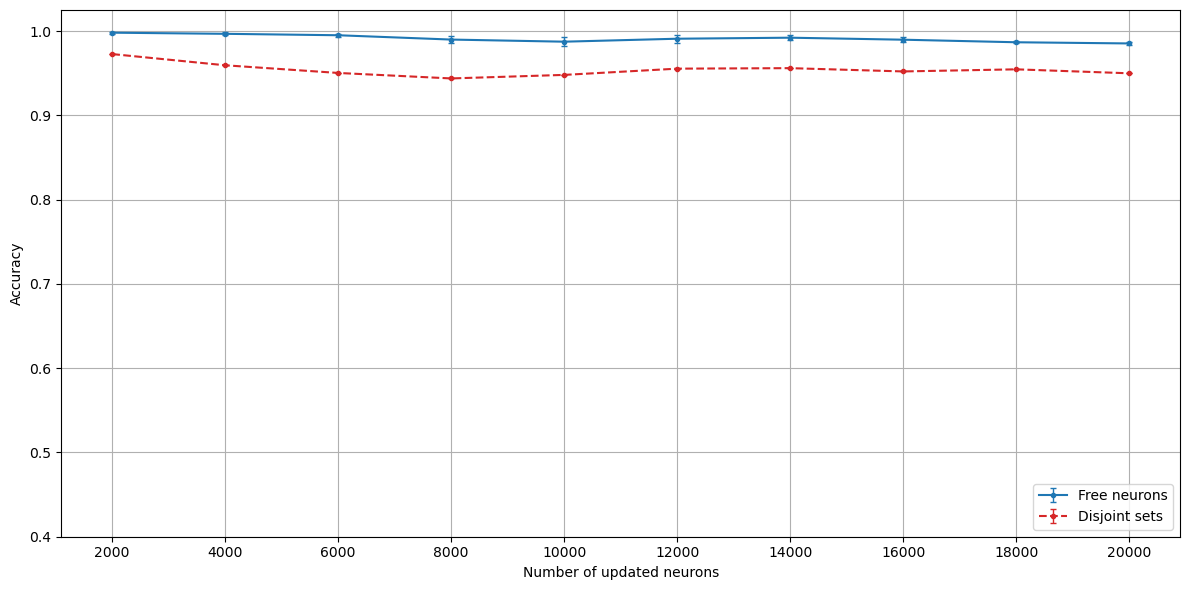

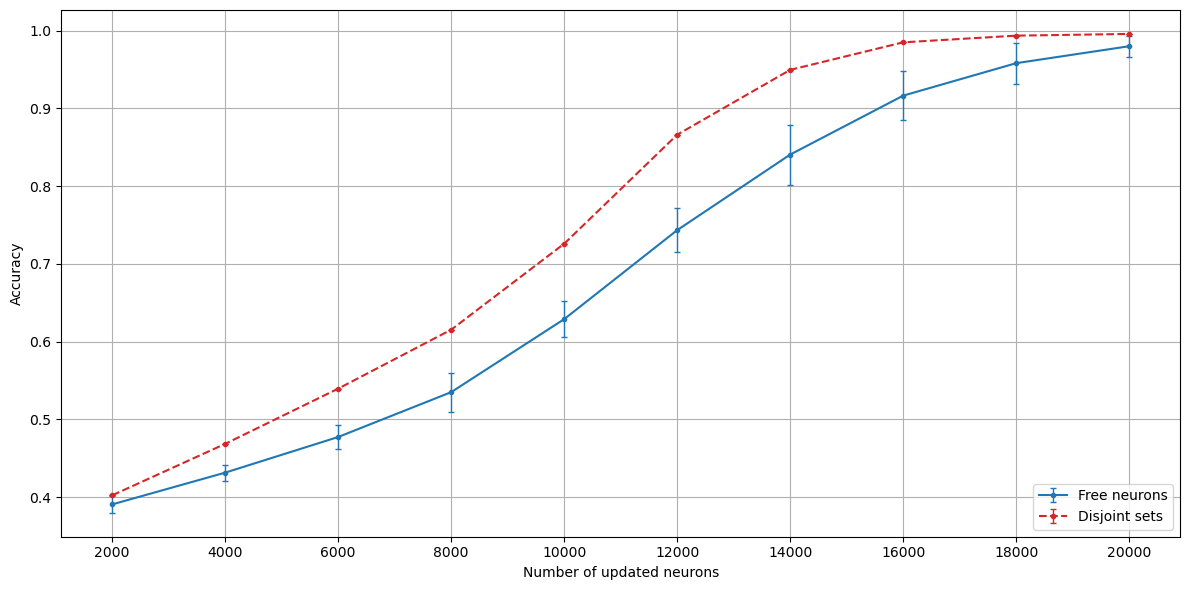

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_folds =  len(data_dis['results'].keys())
n_thresh = len(list(data_dis['results'].values())[0]['cftb'].keys())

fta_accA = 0
ftb_accA = 0
ftb_accB = 0

# Arrays to store individual fold results for calculating std dev
fold_results_cftb_dis_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_dis_accB = np.zeros((n_folds, n_thresh))
fold_results_cftb_free_accA = np.zeros((n_folds, n_thresh))
fold_results_cftb_free_accB = np.zeros((n_folds, n_thresh))

for i, fold in enumerate(data_free['results']):
    #fta_accA += data['results'][fold]['cfta']["free"]['acc_A']

    cftb_dis_results = data_dis['results'][fold]['cftb']
    cftb_free_results = data_free['results'][fold]['cftb']

    fold_results_cftb_dis_accA[i, :] = np.array([cftb_dis_results[t]['avg_accA'] for t in cftb_dis_results]).astype(float)
    fold_results_cftb_dis_accB[i, :] = np.array([cftb_dis_results[t]['avg_accB'] for t in cftb_dis_results]).astype(float)
    fold_results_cftb_free_accA[i, :] = np.array([cftb_free_results[t]['free_A']['avg_accA'] for t in cftb_free_results]).astype(float)
    fold_results_cftb_free_accB[i, :] = np.array([cftb_free_results[t]['free_A']['avg_accB'] for t in cftb_free_results]).astype(float)


fta_accA /= n_folds
ftb_accA /= n_folds
ftb_accB /= n_folds

cftb_free_accA = np.mean(fold_results_cftb_free_accA, axis=0)
cftb_free_accB = np.mean(fold_results_cftb_free_accB, axis=0)
cftb_dis_accA = np.mean(fold_results_cftb_dis_accA, axis=0)
cftb_dis_accB = np.mean(fold_results_cftb_dis_accB, axis=0)

# Calculate standard deviation
# std_cftb_busy_accA = np.std(fold_results_cftb_busy_accA, axis=0)
# std_cftb_busy_accB = np.std(fold_results_cftb_busy_accB, axis=0)
std_cftb_free_accA = np.std(fold_results_cftb_free_accA, axis=0)
std_cftb_free_accB = np.std(fold_results_cftb_free_accB, axis=0)

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Creating custom x labels
x_labels = list(cftb_dis_results.keys())

# First subplot
# axs.axhline(y=fta_accA, color='firebrick', linestyle='solid', linewidth=1.5, alpha=0.80, label='Initial')
# axs.axhline(y=ftb_accA, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')

axs.errorbar(x_labels, cftb_free_accA, yerr=std_cftb_free_accA, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
axs.errorbar(x_labels, cftb_dis_accA, yerr=std_cftb_dis_accA, linestyle='--', linewidth=1.5, color='tab:red', marker='.', capsize=2, elinewidth=1, capthick=1, label='Disjoint sets')
axs.set_xlabel('Number of updated neurons')
axs.set_ylabel('Accuracy')
#axs.set_title('Sequential learning experiment - Accuracy of Previous Knowledge')
axs.legend(loc='lower right')
axs.set_ylim(0.4, 1.025)
axs.grid(True)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Second subplot
# axs.axhline(y=ftb_accB, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')

axs.errorbar(x_labels, cftb_free_accB, yerr=std_cftb_free_accB, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
axs.errorbar(x_labels, cftb_dis_accB, yerr=std_cftb_dis_accB, linestyle='--', linewidth=1.5, color='tab:red', marker='.', capsize=2, elinewidth=1, capthick=1, label='Disjoint sets')
axs.set_xlabel('Number of updated neurons')
axs.set_ylabel('Accuracy')
#axs.set_title('Sequential learning experiment - Accuracy of New Knowledge')
axs.legend(loc='lower right')
axs.grid(True)

plt.tight_layout()
plt.show()